[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/21bf0023-e44f-41df-9bbb-
[nltk_data]     de76c8b8e94c/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



    1 Load and display the series_movies data?.
    2 Visualize the distribution of rating.
    3 Sentiment Analysis
    4 Classification of Sentiment
    5 Visualisation of Sentiment
    0 to exit
    : 5


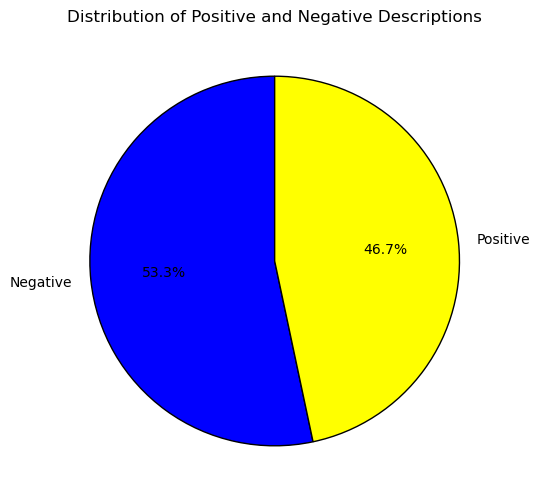

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') 

"""Task Requirements:
Write a Python script that performs the following operations:
1. Data Loading
a. Load the dataset series_movies_descriptions.csv into a Pandas dataframe.
b. Display the first few rows of the dataframe to confirm successful import.(3 Marks)
"""
file_path = "series_movies_descriptions.csv"
df = pd.read_csv(file_path)

def dataFile_Display (file_path):
   
    df = pd.read_csv(file_path)
    print(df.head())
    
    askUser ()
    return df

def clear_console():
    import os
    os.system('cls' if os.name == 'nt' else 'clear')

"""2. Exploratory Data Analysis
a. Visualise the distribution of the ratings using an appropriate chart (e.g., histogram or barchart).(2 Marks)
b. Display the count of each unique rating to understand how ratings are distributed across the dataset.(2 Marks)"""

def exploratory_data_analysis(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Visualize the distribution of ratings
    plt.figure(figsize=(10, 6))
    plt.hist(df['Rating'], bins=5, color='skyblue', edgecolor='black')
    plt.title('Distribution of Rating')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

    # Display the count of each unique rating
    rating_counts = df['Rating'].value_counts()
    print("Count of each unique rating:\n", rating_counts)
    askUser()
'''
3. Sentiment Analysis
a. Use a suitable natural language processing library (e.g., TextBlob, VADER) to compute sentiment polarity scores for each movie or series description.
b. Add a new column to the dataframe called 'Polarity' to store the sentiment score of each description.
(5 Marks)'''

def add_vader_polarity(df, text_column='description'):
    sia = SentimentIntensityAnalyzer()
    df['Polarity'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    print(df.head())
    return df
    askUser()
'''
4. Classification of Sentiment
a. Based on the polarity value, classify each description as either 'Positive' (if polarity > 0) or 'Negative' (if polarity ≤ 0).
b. Add this classification as a new column in the dataframe called 'Sentiment Label'.(6 Marks)''' 
def class_sentiment(file_path):
    # Initialize Sentiment Analyzer
    sIa = SentimentIntensityAnalyzer()

    # Compute sentiment polarity scores
    df['Polarity'] = df['description'].apply(lambda text: sIa.polarity_scores(str(text))['compound'])

    # Classify sentiment based on polarity value
    df['Sentiment Label'] = df['Polarity'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

    print(df[['description', 'Polarity', 'Sentiment Label']].head())
    return df
    askUser()

'''5. Visualisation
a. Plot a chart (e.g., bar chart or pie chart) that shows the distribution of 'Positive' and 'Negative' descriptions.
(3 Marks)'''
def plot_sentiment_distribution(file_path,df):
    
    df = pd.read_csv(file_path)
    text_column='description'

    sia = SentimentIntensityAnalyzer()
    df['Polarity'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    
    #Classify sentiment based on polarity value
    df['Sentiment Label'] = df['Polarity'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

    sentiment_counts = df['Sentiment Label'].value_counts()

    # Plot a bar chart for sentiment distribution
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['blue', 'yellow'], startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title("Distribution of Positive and Negative Descriptions")
    plt.show()
    askUser()

def askUser ():
    
    getting = 0
    getting = input("""
    1 Load and display the series_movies data?.
    2 Visualize the distribution of rating.
    3 Sentiment Analysis
    4 Classification of Sentiment
    5 Visualisation of Sentiment
    0 to exit
    :""")

    match getting:
        case "1":
            dataFile_Display(file_path)
            #clear_console()
        case "2":
            exploratory_data_analysis("series_movies_descriptions.csv")
        case "3":
            add_vader_polarity(df, text_column='description')
        case "4":
            class_sentiment(file_path)
        case "5":
            plot_sentiment_distribution(file_path, df)
        case "0":
            exit()
            
    
askUser()


In [2]:
import pandas as pd
from textblob import TextBlob

def sentiment_analysis_textblob(csv_file):
    # Load the dataset
    df = pd.read_csv(csv_file)

    # Check if 'description' column exists
    if 'description' not in df.columns:
        print("The dataset does not contain a 'description' column.")
        return
    
    # Compute sentiment polarity scores for each description
    df['Polarity'] = df['description'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

    # Display the first few rows with sentiment scores
    print(df[['description', 'Polarity']].head())

    return df

# Example usage
df_with_sentiment = sentiment_analysis_textblob("series_movies_descriptions.csv")


ModuleNotFoundError: No module named 'textblob'

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Only needed once

def add_vader_polarity(df, text_column='description'):
    sia = SentimentIntensityAnalyzer()
    df['Polarity'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    return df
